## This is a comprehensive cleaning and analysis on Ebay Car Sales
### The analysis of this data can aid in gaining valuable insights into Ebay Car Sales understanding pricing trends, car popularity etc

In [68]:
#loading neccesary dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import matplotlib.ticker as ticker
# Suppressing scientific notation in pandas
pd.set_option('display.float_format', '{:.2f}'.format)
import warnings

# Ignore all warnings
warnings.filterwarnings('ignore')


In [69]:
#loading dataset
df = pd.read_csv('autos.csv', encoding='latin1')
df.head()


,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,2016-03-24 11:52:17,Golf_3_1.6,privat,Angebot,480,test,NaN,1993,manuell,0,golf,150000,0,benzin,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,privat,Angebot,18300,test,coupe,2011,manuell,190,NaN,125000,5,diesel,audi,ja,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",privat,Angebot,9800,test,suv,2004,automatik,163,grand,125000,8,diesel,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,GOLF_4_1_4__3TÜRER,privat,Angebot,1500,test,kleinwagen,2001,manuell,75,golf,150000,6,benzin,volkswagen,nein,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Angebot,3600,test,kleinwagen,2008,manuell,69,fabia,90000,7,diesel,skoda,nein,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21


In [70]:
# Removing non-numeric characters
df['price'] = df['price'].replace({'\$': '', ',': ''}, regex=True)

# Converting to numeric
df['price'] = pd.to_numeric(df['price'], errors='coerce')


In [71]:
#data exploration
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 371528 entries, 0 to 371527
Data columns (total 20 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   dateCrawled          371528 non-null  object
 1   name                 371528 non-null  object
 2   seller               371528 non-null  object
 3   offerType            371528 non-null  object
 4   price                371528 non-null  int64 
 5   abtest               371528 non-null  object
 6   vehicleType          333659 non-null  object
 7   yearOfRegistration   371528 non-null  int64 
 8   gearbox              351319 non-null  object
 9   powerPS              371528 non-null  int64 
 10  model                351044 non-null  object
 11  kilometer            371528 non-null  int64 
 12  monthOfRegistration  371528 non-null  int64 
 13  fuelType             338142 non-null  object
 14  brand                371528 non-null  object
 15  notRepairedDamage    299468 non-nu

In [72]:
#checking rows and columns
df.shape

(371528, 20)

In [73]:
#checking for duplicates
duplicates = df.duplicated()
num_duplicates = duplicates.sum()
num_duplicates

4

In [74]:
#dropping duplicates
df.drop_duplicates(inplace = True)

In [75]:
df.shape

(371524, 20)

In [76]:
df.describe()

,price,yearOfRegistration,powerPS,kilometer,monthOfRegistration,nrOfPictures,postalCode
count,371524.00,371524.00,371524.00,371524.00,371524.00,371524.00,371524.00
mean,17295.30,2004.58,115.55,125618.84,5.73,0.00,50820.49
std,3587973.06,92.87,192.14,40112.14,3.71,0.00,25799.09
min,0.00,1000.00,0.00,5000.00,0.00,0.00,1067.00
25%,1150.00,1999.00,70.00,125000.00,3.00,0.00,30459.00
50%,2950.00,2003.00,105.00,150000.00,6.00,0.00,49610.00
75%,7200.00,2008.00,150.00,150000.00,9.00,0.00,71546.00
max,2147483647.00,9999.00,20000.00,150000.00,12.00,0.00,99998.00


## Summary 
### Description
### Over 370000 used cars scraped with Scrapy from Ebay-Kleinanzeigen.

The content of the data is in german, so one has to translate it first if one can not speak german. Those fields are included:

1. dateCrawled : when this ad was first crawled, all field-values are taken from this date
2. name :        "name" of the car
3. seller :      private or dealer
4. offerType
5. price :       the price on the ad to sell the car
6. abtest
7. vehicleType
8. yearOfRegistration : at which year the car was first registered
9. gearbox
10. powerPS :     power of the car in PS
11. model
12. kilometer :   how many kilometers the car has driven
13. monthOfRegistration : at which month the car was first registered
14. fuelType
15. brand
16. notRepairedDamage : if the car has a damage which is not repaired yet
17. dateCreated :      the date for which the ad at ebay was created
18. nrOfPictures :     number of pictures in the ad
19. postalCode
20. lastSeenOnline :   when the crawler saw this ad last online
21. The fields lastSeen and dateCrawled could be used to estimate how long a car will be at least online before it is sold. 
22. Regression on average Price per Year based on this dataset Happy Coding!

Source: Kaggle

In [77]:
#data cleaning
df.head()

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,2016-03-24 11:52:17,Golf_3_1.6,privat,Angebot,480,test,NaN,1993,manuell,0,golf,150000,0,benzin,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,privat,Angebot,18300,test,coupe,2011,manuell,190,NaN,125000,5,diesel,audi,ja,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",privat,Angebot,9800,test,suv,2004,automatik,163,grand,125000,8,diesel,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,GOLF_4_1_4__3TÜRER,privat,Angebot,1500,test,kleinwagen,2001,manuell,75,golf,150000,6,benzin,volkswagen,nein,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Angebot,3600,test,kleinwagen,2008,manuell,69,fabia,90000,7,diesel,skoda,nein,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21


In [78]:
df['name'].head(n=10)

0                                           Golf_3_1.6
1                                 A5_Sportback_2.7_Tdi
2                       Jeep_Grand_Cherokee_"Overland"
3                                   GOLF_4_1_4__3TÜRER
4                       Skoda_Fabia_1.4_TDI_PD_Classic
5    BMW_316i___e36_Limousine___Bastlerfahrzeug__Ex...
6                          Peugeot_206_CC_110_Platinum
7                         VW_Derby_Bj_80__Scheunenfund
8                 Ford_C___Max_Titanium_1_0_L_EcoBoost
9    VW_Golf_4_5_tuerig_zu_verkaufen_mit_Anhaengerk...
Name: name, dtype: object

In [79]:
df.name.nunique()

233531

In [80]:
def clean_name(name):
    name = name.title() 
    name = name.replace('_', ' ')
    name = name.replace('"', '').strip()
    name = re.sub(r'\d+', '', name)
    name = re.sub(r'//', '', name)
    name = re.sub(r'/', '', name)
    name = re.sub(r'\.', '', name)
    return name

# Apply the function to clean names
df['cleaned_name'] = df['name'].apply(clean_name)

In [81]:
# Renaming the column 'cleaned_name' to 'Name'
df.rename(columns={'cleaned_name': 'Name'}, inplace=True)


In [82]:
df.head()

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,...,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen,Name
0,2016-03-24 11:52:17,Golf_3_1.6,privat,Angebot,480,test,NaN,1993,manuell,0,...,150000,0,benzin,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57,Golf
1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,privat,Angebot,18300,test,coupe,2011,manuell,190,...,125000,5,diesel,audi,ja,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50,A Sportback Tdi
2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",privat,Angebot,9800,test,suv,2004,automatik,163,...,125000,8,diesel,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46,Jeep Grand Cherokee Overland
3,2016-03-17 16:54:04,GOLF_4_1_4__3TÜRER,privat,Angebot,1500,test,kleinwagen,2001,manuell,75,...,150000,6,benzin,volkswagen,nein,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17,Golf Türer
4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Angebot,3600,test,kleinwagen,2008,manuell,69,...,90000,7,diesel,skoda,nein,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21,Skoda Fabia Tdi Pd Classic


In [83]:
#cleaning the seller column by replacing the German names to English 
df.seller.unique()

array(['privat', 'gewerblich'], dtype=object)

In [84]:
df['seller'] = df['seller'].replace({'privat':'private','gewerblich':'commercial'})

In [85]:
#cleaning the OfferType column by replacing the German names to English
df.offerType.unique()

array(['Angebot', 'Gesuch'], dtype=object)

In [86]:
df.offerType = df.offerType.replace({'Angebot':'Vehicle for Sale','Gesuch':'Vehicle Wanted'})

In [87]:
df.offerType.value_counts()

offerType
Vehicle for Sale    371512
Vehicle Wanted          12
Name: count, dtype: int64

In [88]:
#cleaning the vehicle type column by replacing the German names to English
df.vehicleType.unique()

array([nan, 'coupe', 'suv', 'kleinwagen', 'limousine', 'cabrio', 'bus',
       'kombi', 'andere'], dtype=object)

In [89]:
df.vehicleType = df.vehicleType.replace({
    'limousine' : 'Limousine',
    'kleinwagen' : 'Small Car',
    'kombi' : 'Station Wagon',
    'bus' : 'Bus',
    'cabrio' : 'Convertible',
    'coupe' : 'Coupe',
    'suv' : 'Suv',
    'andere' : 'Other'
})

In [90]:
#cleaning the gearbox column by replacing the German names to English
df.gearbox.unique()

array(['manuell', 'automatik', nan], dtype=object)

In [91]:
df.gearbox = df.gearbox.replace({
    'manuell' : 'Manual',
    'automatik': 'Automatic'
})

In [92]:
#cleaning the fuel type column by replacing the German names to English
df.fuelType.unique()

array(['benzin', 'diesel', nan, 'lpg', 'andere', 'hybrid', 'cng',
       'elektro'], dtype=object)

In [93]:

df['fuelType'] = df['fuelType'].replace({
    'benzin': 'Gasoline',
    'diesel': 'Diesel',
    'lpg': 'LPG',
    'cng': 'CNG',
    'hybrid': 'Hybrid',
    'andere': 'Other',
    'elektro': 'Electric'
})


In [94]:
#cleaning the non repaired Damage column by replacing the German names to English
df.notRepairedDamage = df.notRepairedDamage.replace({'ja':'Yes','nein':'No'})

In [95]:
#Renaming the power PS column for easy understanding
df.rename(columns={'powerPS':'car_horsePower'}, inplace = True)

In [96]:
#Exploratory Data Analysis
df.head()

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,car_horsePower,...,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen,Name
0,2016-03-24 11:52:17,Golf_3_1.6,private,Vehicle for Sale,480,test,NaN,1993,Manual,0,...,150000,0,Gasoline,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57,Golf
1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,private,Vehicle for Sale,18300,test,Coupe,2011,Manual,190,...,125000,5,Diesel,audi,Yes,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50,A Sportback Tdi
2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",private,Vehicle for Sale,9800,test,Suv,2004,Automatic,163,...,125000,8,Diesel,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46,Jeep Grand Cherokee Overland
3,2016-03-17 16:54:04,GOLF_4_1_4__3TÜRER,private,Vehicle for Sale,1500,test,Small Car,2001,Manual,75,...,150000,6,Gasoline,volkswagen,No,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17,Golf Türer
4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,private,Vehicle for Sale,3600,test,Small Car,2008,Manual,69,...,90000,7,Diesel,skoda,No,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21,Skoda Fabia Tdi Pd Classic


In [97]:
#converting date columns to date time
df[['dateCrawled','dateCreated','lastSeen']] = df[['dateCrawled','dateCreated','lastSeen']].apply(pd.to_datetime)

In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 371524 entries, 0 to 371527
Data columns (total 21 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   dateCrawled          371524 non-null  datetime64[ns]
 1   name                 371524 non-null  object        
 2   seller               371524 non-null  object        
 3   offerType            371524 non-null  object        
 4   price                371524 non-null  int64         
 5   abtest               371524 non-null  object        
 6   vehicleType          333655 non-null  object        
 7   yearOfRegistration   371524 non-null  int64         
 8   gearbox              351315 non-null  object        
 9   car_horsePower       371524 non-null  int64         
 10  model                351040 non-null  object        
 11  kilometer            371524 non-null  int64         
 12  monthOfRegistration  371524 non-null  int64         
 13  fuelType           

In [99]:
#checking % missing columns
missing_data = (df.isna().sum() / len(df)) * 100
missing_data

dateCrawled            0.00
name                   0.00
seller                 0.00
offerType              0.00
price                  0.00
abtest                 0.00
vehicleType           10.19
yearOfRegistration     0.00
gearbox                5.44
car_horsePower         0.00
model                  5.51
kilometer              0.00
monthOfRegistration    0.00
fuelType               8.99
brand                  0.00
notRepairedDamage     19.40
dateCreated            0.00
nrOfPictures           0.00
postalCode             0.00
lastSeen               0.00
Name                   0.00
dtype: float64

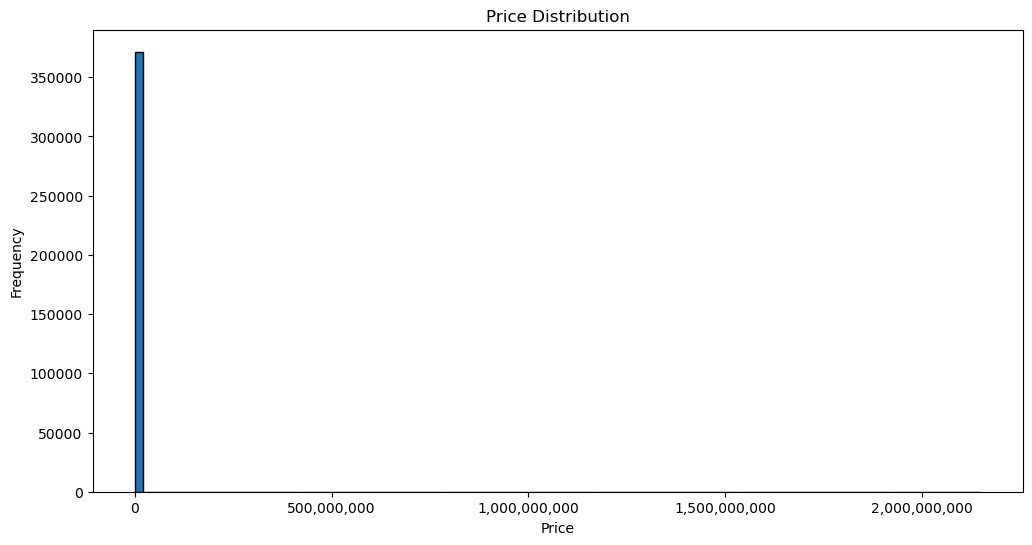

In [100]:
#checking Price distribution of the Cars
import matplotlib.ticker as ticker

plt.figure(figsize=(12, 6))
plt.hist(df['price'], bins=100, edgecolor='k')
plt.title('Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')

# Formatting x-axis to avoid scientific notation
plt.gca().xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))

plt.show()


#### Most cars are within the price range of 0 and are lower than 500,000,000. Removing Outliers might improve the distribution 

In [101]:
print(df['price'].min())
print(df['price'].max())

0
2147483647


In [102]:
#checking cars that have zero price value and the ones that are outrageously high
# Defining the price range for outliers
lower_bound = 500_000_000
upper_bound = 2_500_000_000

# Filtering the DataFrame to access outliers
outliers_df = df[(df['price'] == 0) | ((df['price'] >= lower_bound) & (df['price'] <= upper_bound))]
outliers_df

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,car_horsePower,...,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen,Name
7,2016-03-21 18:54:38,VW_Derby_Bj_80__Scheunenfund,private,Vehicle for Sale,0,test,Limousine,1980,Manual,50,...,40000,7,Gasoline,volkswagen,No,2016-03-21,0,19348,2016-03-25 16:47:58,Vw Derby Bj Scheunenfund
40,2016-03-26 22:06:17,Suche_Opel_corsa_a_zu_verschenken,private,Vehicle for Sale,0,test,NaN,1990,NaN,0,...,150000,1,Gasoline,opel,NaN,2016-03-26,0,56412,2016-03-27 17:43:34,Suche Opel Corsa A Zu Verschenken
115,2016-03-19 18:40:12,Golf_IV_1.4_16V,private,Vehicle for Sale,0,test,NaN,2017,Manual,0,...,5000,12,Gasoline,volkswagen,NaN,2016-03-19,0,21698,2016-04-01 08:47:05,Golf Iv V
119,2016-03-20 18:53:27,Polo_6n_Karosse_zu_verschenken,private,Vehicle for Sale,0,test,Small Car,1999,NaN,0,...,5000,0,Gasoline,volkswagen,NaN,2016-03-20,0,37520,2016-04-07 02:45:22,Polo N Karosse Zu Verschenken
157,2016-03-11 18:55:53,Opel_meriva_1.6_16_v_lpg__z16xe_no_OPC,private,Vehicle for Sale,0,test,Bus,2004,Manual,101,...,150000,10,LPG,opel,Yes,2016-03-11,0,27432,2016-03-12 23:47:10,Opel Meriva V Lpg ZXe No Opc
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
371356,2016-03-09 15:56:30,Verkaufen_einen_Opel_corsa_b_worlcup_cool,private,Vehicle for Sale,0,control,NaN,2000,Manual,65,...,150000,0,NaN,opel,Yes,2016-03-09,0,23758,2016-03-30 11:16:08,Verkaufen Einen Opel Corsa B Worlcup Cool
371392,2016-03-20 14:55:07,Ford_Fiesta_1.3___60PS___Bj_2002___Klima___Servo,private,Vehicle for Sale,0,test,Small Car,2002,Manual,60,...,150000,3,Gasoline,ford,NaN,2016-03-20,0,33659,2016-04-06 18:45:23,Ford Fiesta Ps Bj Klima Servo
371402,2016-03-24 13:48:05,Suzuki_Swift_zu_verkaufen,private,Vehicle for Sale,0,control,Small Car,1999,Manual,53,...,150000,3,Gasoline,suzuki,NaN,2016-03-24,0,42329,2016-04-07 05:17:24,Suzuki Swift Zu Verkaufen
371431,2016-03-10 22:55:50,Seat_Arosa,private,Vehicle for Sale,0,control,Small Car,1999,Manual,37,...,150000,7,Gasoline,seat,Yes,2016-03-10,0,22559,2016-03-12 23:46:32,Seat Arosa


In [103]:
outliers_df['price'].value_counts()

price
0             10778
2147483647        1
Name: count, dtype: int64

#### Many cars in the dataset are priced at zero, likely due to incorrect data entry. While there are methods to handle such cases, such as filling missing values with the mean or median, these zero prices are likely to have minimal impact on the overall analysis. Therefore, I have decided to remove these entries from the dataset to maintain the quality and relevance of the data.



In [104]:
#removing rows that the price is 0
data = df[df['price'] != 0]
data.shape

(360746, 21)

In [105]:
data['price'].describe()

count       360746.00
mean         17812.03
std        3641176.36
min              1.00
25%           1250.00
50%           3000.00
75%           7490.00
max     2147483647.00
Name: price, dtype: float64

In [106]:
# Checking for prices that are within the range of 10000
filtered_data = data[(data['price'] <= 50000)]
filtered_data.head()

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,car_horsePower,...,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen,Name
0,2016-03-24 11:52:17,Golf_3_1.6,private,Vehicle for Sale,480,test,NaN,1993,Manual,0,...,150000,0,Gasoline,volkswagen,NaN,2016-03-24,0,70435,2016-04-07 03:16:57,Golf
1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,private,Vehicle for Sale,18300,test,Coupe,2011,Manual,190,...,125000,5,Diesel,audi,Yes,2016-03-24,0,66954,2016-04-07 01:46:50,A Sportback Tdi
2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",private,Vehicle for Sale,9800,test,Suv,2004,Automatic,163,...,125000,8,Diesel,jeep,NaN,2016-03-14,0,90480,2016-04-05 12:47:46,Jeep Grand Cherokee Overland
3,2016-03-17 16:54:04,GOLF_4_1_4__3TÜRER,private,Vehicle for Sale,1500,test,Small Car,2001,Manual,75,...,150000,6,Gasoline,volkswagen,No,2016-03-17,0,91074,2016-03-17 17:40:17,Golf Türer
4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,private,Vehicle for Sale,3600,test,Small Car,2008,Manual,69,...,90000,7,Diesel,skoda,No,2016-03-31,0,60437,2016-04-06 10:17:21,Skoda Fabia Tdi Pd Classic


In [107]:
filtered_data.shape

(359184, 21)

In [108]:
filtered_data['price'].describe()

count   359184.00
mean      5579.11
std       6683.60
min          1.00
25%       1250.00
50%       3000.00
75%       7350.00
max      50000.00
Name: price, dtype: float64

#### It is seen here that the majority of the cars cost lower or equal 50,000 euros with only few cars seen above that price. To explore that, the dataset will be filtered to only cars less than or equal 50,000 to check the distribution.

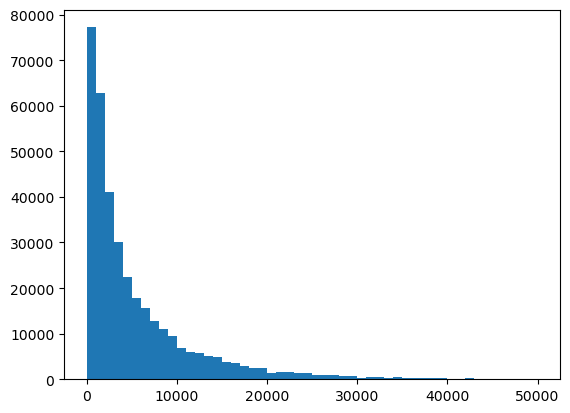

In [109]:
plt.hist(filtered_data['price'], bins=50);

#### As seen from the distribution above, the bulk of cars are priced between 1 and 30,000. There are few outliers however they won't be removed as they can be important for the analysis

## Handling Missing Values for Categorical Columns

In [110]:
#filling missing value for vehicle type
data.loc[:, 'vehicleType'] = data['vehicleType'].fillna('Unknown')

In [111]:
data['gearbox'].value_counts()

gearbox
Manual       267330
Automatic     75687
Name: count, dtype: int64

In [112]:
data.loc[:,'gearbox'] = data['gearbox'].fillna('Unknown')

In [113]:
data.loc[:,'fuelType'] = data['fuelType'].fillna('Unknown')

In [114]:
data.loc[:,'notRepairedDamage'] = data['notRepairedDamage'].fillna('Unknown')

In [115]:
data.isna().sum()

dateCrawled                0
name                       0
seller                     0
offerType                  0
price                      0
abtest                     0
vehicleType                0
yearOfRegistration         0
gearbox                    0
car_horsePower             0
model                  18300
kilometer                  0
monthOfRegistration        0
fuelType                   0
brand                      0
notRepairedDamage          0
dateCreated                0
nrOfPictures               0
postalCode                 0
lastSeen                   0
Name                       0
dtype: int64

In [116]:
#removing columns that aren't needed for the analysis
columns_to_drop =['abtest','model','nrOfPictures','postalCode','name']
data.drop(columns = columns_to_drop, inplace = True)
data.head()

,dateCrawled,seller,offerType,price,vehicleType,yearOfRegistration,gearbox,car_horsePower,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,lastSeen,Name
0,2016-03-24 11:52:17,private,Vehicle for Sale,480,Unknown,1993,Manual,0,150000,0,Gasoline,volkswagen,Unknown,2016-03-24,2016-04-07 03:16:57,Golf
1,2016-03-24 10:58:45,private,Vehicle for Sale,18300,Coupe,2011,Manual,190,125000,5,Diesel,audi,Yes,2016-03-24,2016-04-07 01:46:50,A Sportback Tdi
2,2016-03-14 12:52:21,private,Vehicle for Sale,9800,Suv,2004,Automatic,163,125000,8,Diesel,jeep,Unknown,2016-03-14,2016-04-05 12:47:46,Jeep Grand Cherokee Overland
3,2016-03-17 16:54:04,private,Vehicle for Sale,1500,Small Car,2001,Manual,75,150000,6,Gasoline,volkswagen,No,2016-03-17,2016-03-17 17:40:17,Golf Türer
4,2016-03-31 17:25:20,private,Vehicle for Sale,3600,Small Car,2008,Manual,69,90000,7,Diesel,skoda,No,2016-03-31,2016-04-06 10:17:21,Skoda Fabia Tdi Pd Classic


In [117]:
#saving the data analyzed 
data.to_csv('autos.csv', index=False)  

## Analysis and Visualization
### The data has been cleaned properly, I can begin analysis by exploring connections amongst different columns

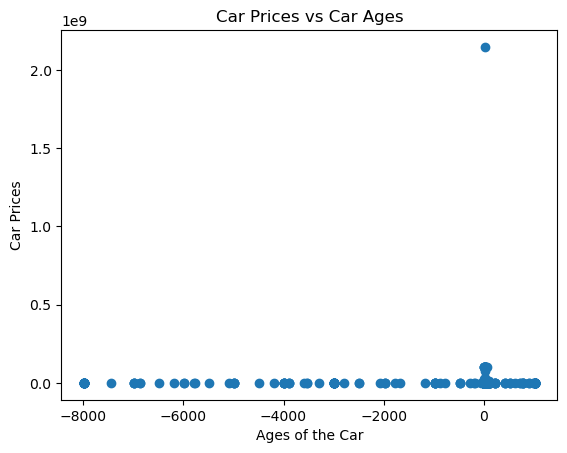

In [118]:
#creating a new column for car age
# Extracting the year from 'dateCrawled'
data['crawledYear'] = pd.to_datetime(data['dateCrawled']).dt.year

# Calculating car age
data['age'] = data['crawledYear'] - data['yearOfRegistration']

#checking to see if there is a corellation with car age and price it is to be sold for
plt.scatter(x=data['age'], y=data['price'])
plt.title('Car Prices vs Car Ages')
plt.ylabel('Car Prices')
plt.xlabel('Ages of the Car');

#### There is no correlation seen with the ages of the cars and the prices they were to be sold for. 

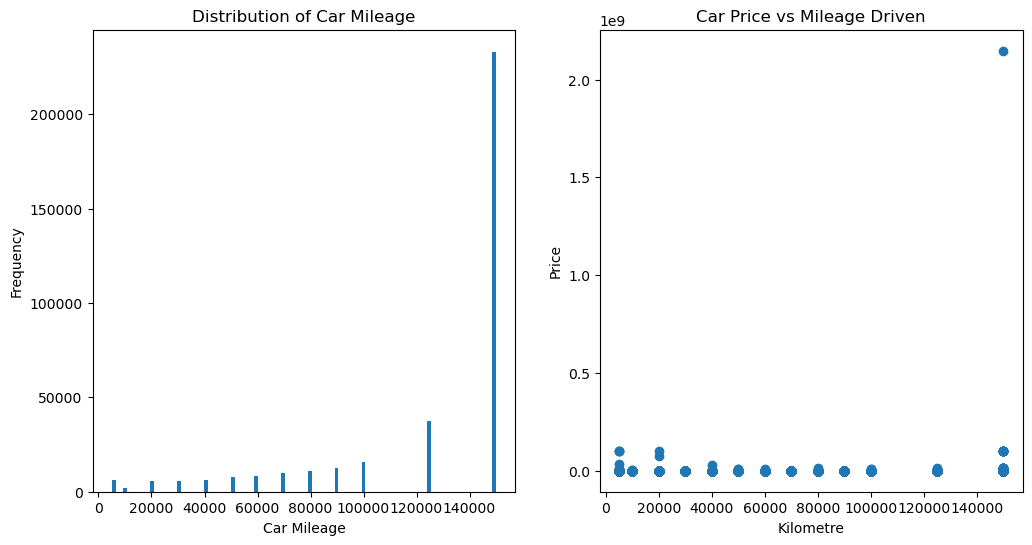

In [119]:
# Creating a subplot to plot two charts side by side
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Distribution of Car Mileage
axes[0].hist(data['kilometer'], bins=100)
axes[0].set_title('Distribution of Car Mileage')
axes[0].set_xlabel('Car Mileage')
axes[0].set_ylabel('Frequency')

# Relationship of Car Mileage with Price
axes[1].scatter(x=data['kilometer'], y=data['price'])
axes[1].set_title('Car Price vs Mileage Driven')
axes[1].set_xlabel('Kilometre')
axes[1].set_ylabel('Price');

#### As seen from the chart above, most of the cars have a high mileage with over 150,000 indicating that they have been driven a substatial amount. However this is expected as the cars have been previously used and now thrifted.
#### While it is expected that cars with high mileage will reduce the cost price of a car, there is no correlation that cars with high mileage have lower prices as the prices are all within the same range

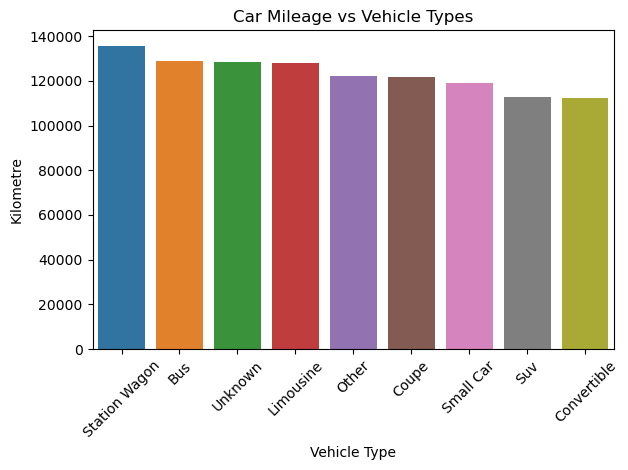

In [120]:
#exploring the different mileages by vehicle types by first determining the average mileage 
avg_mileage = data.groupby('vehicleType')['kilometer'].mean().reset_index()
sorted_avg_mileage = avg_mileage.sort_values(by = 'kilometer', ascending = False)
sns.barplot(y = 'kilometer', x = 'vehicleType', data = sorted_avg_mileage)
plt.title('Car Mileage vs Vehicle Types')
plt.ylabel('Kilometre')
plt.xlabel('Vehicle Type')
plt.xticks(rotation=45)

# Adjusting layout to prevent overlap
plt.tight_layout()

#### Of all the cars, the Station wagon have the most mileage.

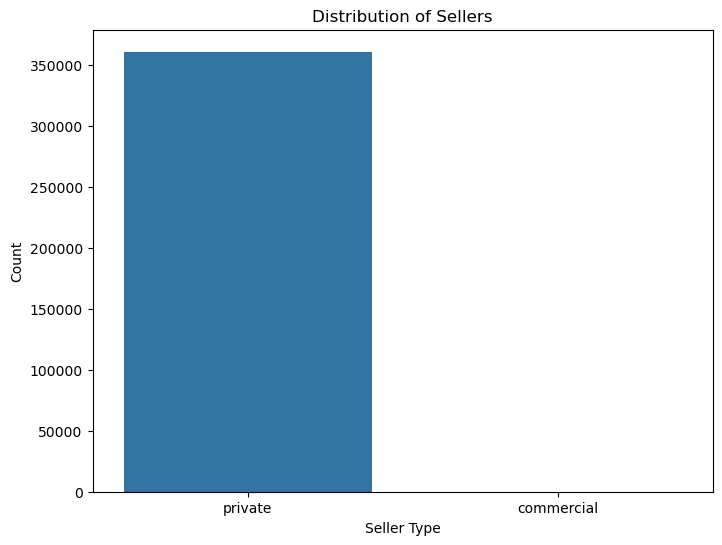

In [121]:
#Analyzing the seller column 
plt.figure(figsize=(8, 6))
sns.countplot(x=data['seller'], data = data)
plt.title('Distribution of Sellers')
plt.xlabel('Seller Type')
plt.ylabel('Count');

##### The sellers were mostly private owners and not dealers

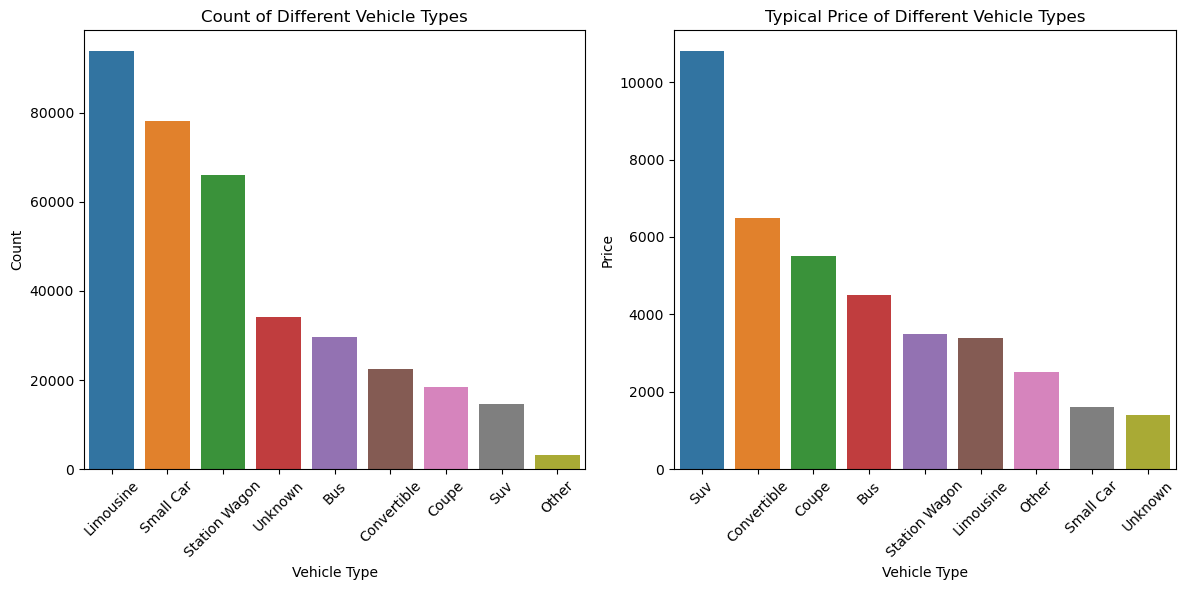

In [122]:
# Creating a subplot with 1 row and 2 columns
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# First plot: Count of Different Vehicle Types
sns.countplot(ax=axes[0], x='vehicleType', data=data, order=data['vehicleType'].value_counts().index)
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45)
axes[0].set_title('Count of Different Vehicle Types')
axes[0].set_xlabel('Vehicle Type')
axes[0].set_ylabel('Count')

# Second plot: Median Price of Different Vehicle Types
grouped_vehicle_price = data.groupby('vehicleType')['price'].median().reset_index()
sorted_grouped_vehicle_price = grouped_vehicle_price.sort_values(by='price', ascending=False)
sns.barplot(ax=axes[1], x='vehicleType', y='price', data=sorted_grouped_vehicle_price)
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45)
axes[1].set_title('Typical Price of Different Vehicle Types')
axes[1].set_xlabel('Vehicle Type')
axes[1].set_ylabel('Price')

# Adjust layout to prevent overlap
plt.tight_layout()


#### The cars that were commonly put for sale was the Limousine. I then used the median price to compare the different vehicle types as it provides a more accurate representation of the typical vehicle costs. Especially as the more expensive cars and cheap cars would distort the average. The median gives a clearer picture of what most cars in each category are priced at with the SUV having the highest price at over 10,000 Euros

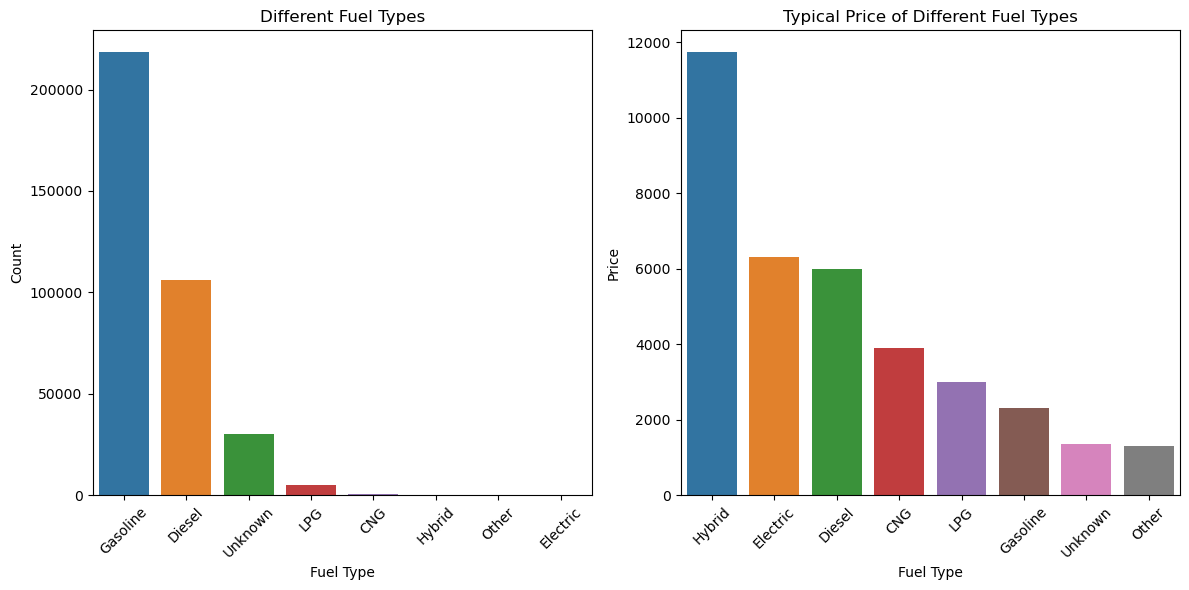

In [123]:
# Creating a subplot with 1 row and 2 columns
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
# First plot: Count of Different Fuel Types
sns.countplot(ax=axes[0], x='fuelType', data=data, order=data['fuelType'].value_counts().index)
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45)
axes[0].set_title('Different Fuel Types')
axes[0].set_xlabel('Fuel Type')
axes[0].set_ylabel('Count')

# Second plot: Median Price of Cars with Different Fuel Types
grouped_fuel_price = data.groupby('fuelType')['price'].median().reset_index()
sorted_grouped_fuel_price = grouped_fuel_price.sort_values(by='price', ascending=False)
sns.barplot(ax=axes[1], x='fuelType', y='price', data=sorted_grouped_fuel_price)
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45)
axes[1].set_title('Typical Price of Different Fuel Types')
axes[1].set_xlabel('Fuel Type')
axes[1].set_ylabel('Price')

# Adjust layout to prevent overlap
plt.tight_layout()

#### While Gasoline cars are the most common, the hybrid cars are the most expensive as expected since they use more than one fuel type. 

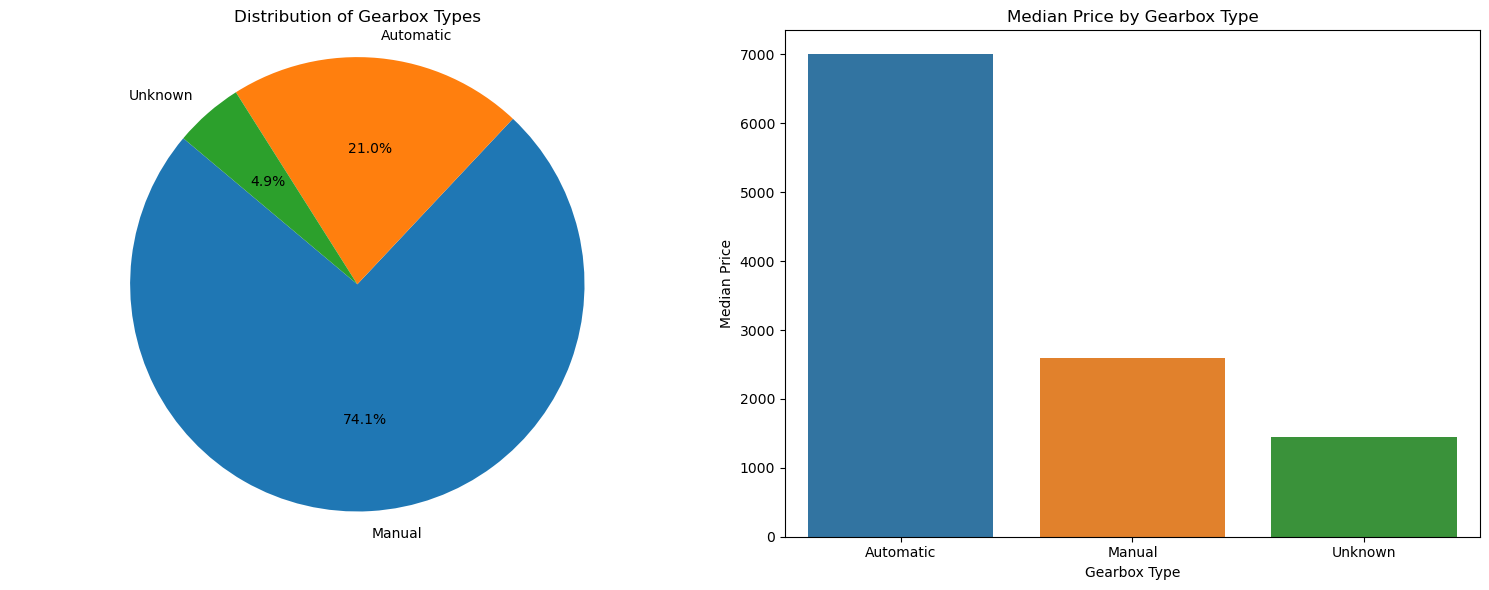

In [124]:
# Calculating the value counts for 'gearbox'
gearbox_counts = data['gearbox'].value_counts()

fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Plotting the pie chart on the first subplot
axes[0].pie(gearbox_counts, labels=gearbox_counts.index, autopct='%1.1f%%', startangle=140)
axes[0].set_title('Distribution of Gearbox Types')
axes[0].axis('equal')

# Plotting the bar plot on the second subplot
grouped_gearbox = data.groupby('gearbox')['price'].median().reset_index()
sns.barplot(x='gearbox', y='price', data=grouped_gearbox, ax=axes[1])
axes[1].set_title('Median Price by Gearbox Type')
axes[1].set_xlabel('Gearbox Type')
axes[1].set_ylabel('Median Price')

plt.tight_layout()


#### Cars with manual gearboxes were more frequently listed for sale, whereas those with automatic gearboxes generally had higher prices.

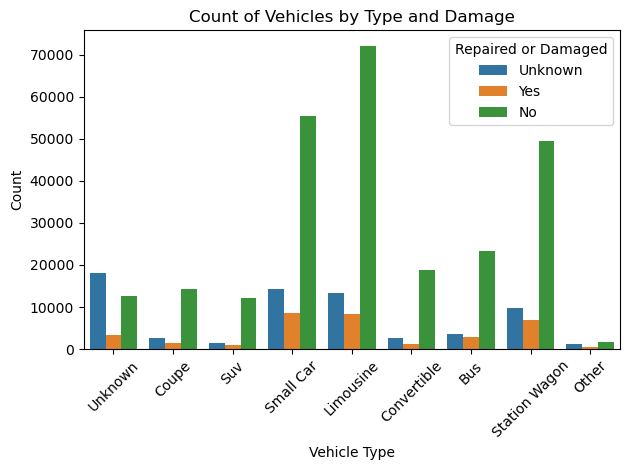

In [125]:
sns.countplot(x='vehicleType',hue='notRepairedDamage',data = data)
plt.title('Count of Vehicles by Type and Damage')
plt.xlabel('Vehicle Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Repaired or Damaged')
plt.tight_layout();

##### Majority of the cars were in good condition

           brand  listing_count
0     volkswagen          77038
1            bmw          39168
2           opel          38734
3  mercedes_benz          34619
4           audi          31991
5           ford          24850
6        renault          17430
7        peugeot          10810
8           fiat           9365
9           seat           6833


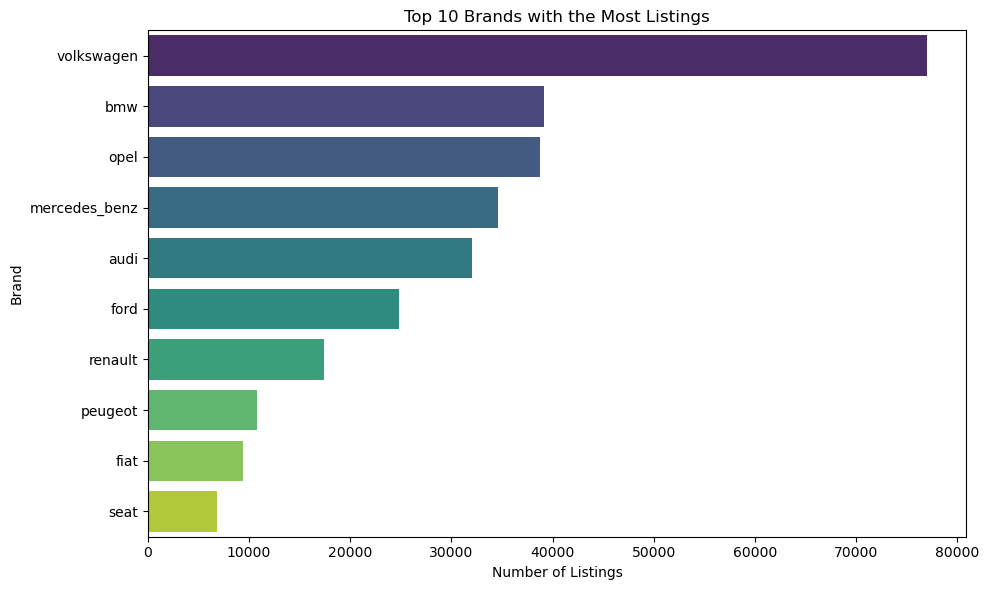

In [126]:
#Analyzing the brand of the cars. This will be restricted to the top 10 cars as the brands are plenty.
#Grouping by brand and counting the number of listings
top_brands = data['brand'].value_counts().head(10).reset_index()

# Renaming the columns for better understanding
top_brands.columns = ['brand', 'listing_count']

# Displaying the top 10 brands
print(top_brands)

#Visualizing the top 10
plt.figure(figsize=(10, 6))
sns.barplot(x='listing_count', y='brand', data=top_brands, palette='viridis')
plt.title('Top 10 Brands with the Most Listings')
plt.xlabel('Number of Listings')
plt.ylabel('Brand')
plt.tight_layout()
plt.show()


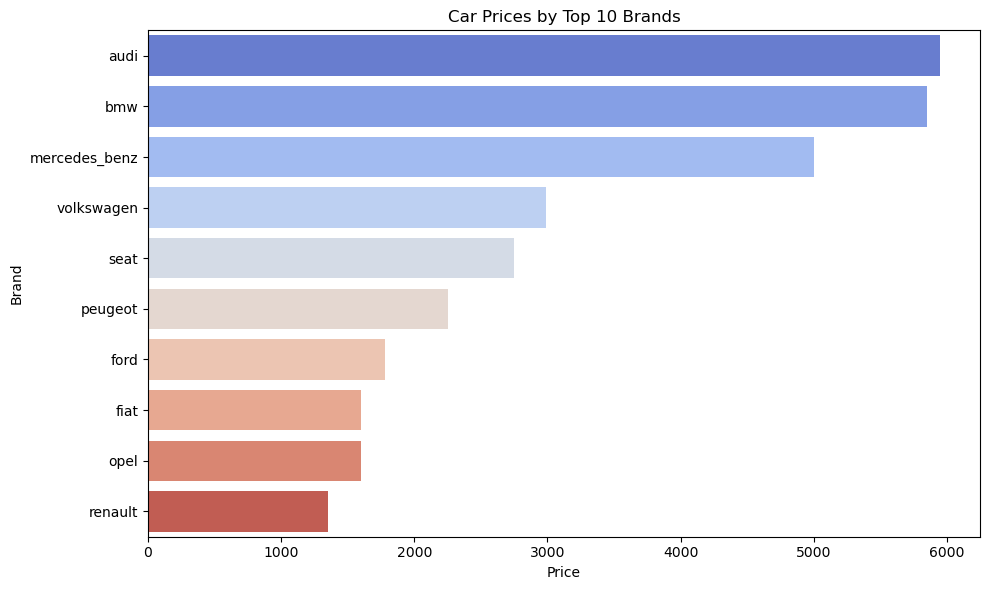

In [127]:
# Filtering the data for the top 10 brands
top_10_brands = top_brands['brand'].tolist()
filtered_data = data[data['brand'].isin(top_10_brands)]

# Price analysis using Median price for each brand
price_analysis = filtered_data.groupby('brand')['price'].median().reset_index()
price_analysis = price_analysis.sort_values(by='price', ascending=False)

# Plotting the median price by brand
plt.figure(figsize=(10, 6))
sns.barplot(x='price', y='brand', data=price_analysis, palette='coolwarm')
plt.title('Car Prices by Top 10 Brands')
plt.xlabel('Price')
plt.ylabel('Brand')
plt.tight_layout()

#### I filtered the dataset to include the top 10 most advertised car brands. Volkswagen had the highest number of listings, while Audi emerged as the most expensive, followed closely by BMW.

### Time-series Analysis

In [128]:
# Calculating the 'day_online' column as the difference between 'lastSeen' and 'dateCreated' in days
data['day_online'] = (data['lastSeen'] - data['dateCreated']).dt.days
#Extracting year and month separately
data['listing_year'] = data['dateCreated'].dt.year
data['listing_month'] = data['dateCreated'].dt.month


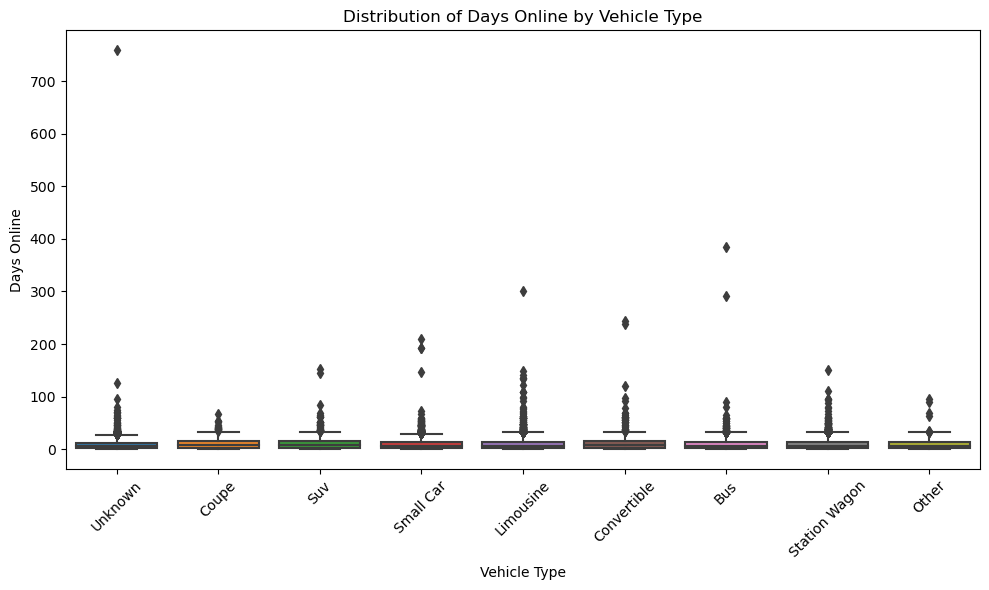

In [129]:
# Distribution of the vehicle types across how long they started online as ads
plt.figure(figsize=(10, 6))
sns.boxplot(x='vehicleType', y='day_online', data=data)
plt.title('Distribution of Days Online by Vehicle Type')
plt.xlabel('Vehicle Type')
plt.ylabel('Days Online')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


#### Most cars last 100 days online before they are sold but there are few exceptions across every vehicle types with the longest car on sale for 700 days. 

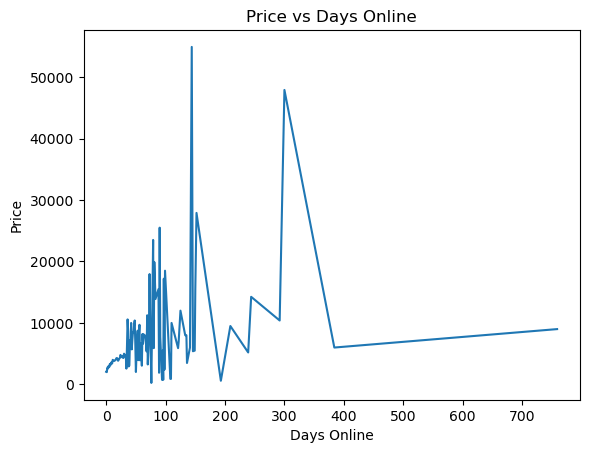

In [130]:
median_price_per_day = data.groupby('day_online')['price'].median().reset_index()
plt.plot(avg_price_per_day['day_online'], median_price_per_day['price'])
plt.title('Price vs Days Online')
plt.xlabel('Days Online')
plt.ylabel('Price')
plt.show()


#### Car prices show a sharp increase around day 150, but if the cars remain unsold, prices tend to decline sharply, likely due to the listing being active for an extended period. Interestingly, there is another price increase observed around day 300.

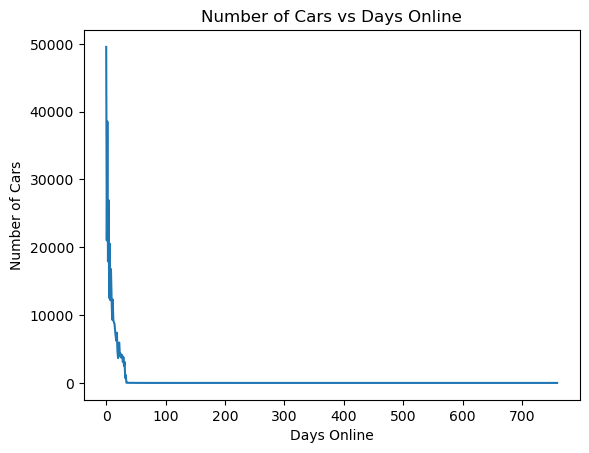

In [131]:
car_count_per_day = data['day_online'].value_counts().sort_index()
plt.plot(car_count_per_day.index, car_count_per_day.values)
plt.title('Number of Cars vs Days Online')
plt.xlabel('Days Online')
plt.ylabel('Number of Cars')
plt.show()

#### Most cars remain listed online for 0 to 100 days before they are either sold or removed from the platform.

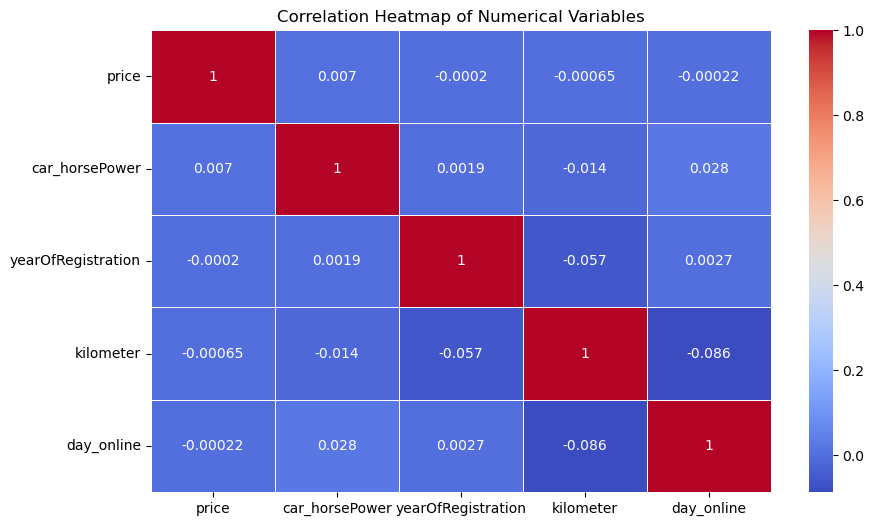

In [132]:
# Selecting the relevant numerical columns for correlation analysis
numerical_columns = ['price', 'car_horsePower', 'yearOfRegistration', 'kilometer', 'day_online']

# Correlation matrix
corr_matrix = data[numerical_columns].corr()

# Plotting the Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Variables')
plt.show()


#### There is no significant correlation observed among the numerical variables. Interestingly, none of these variables appear to have a notable impact on car prices.